In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Drop 'Cabin' due to excessive missing values
df = df.drop(columns=['Cabin'])

# Fill missing 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Cabin dropped due to 77% missing values, as it’s not critical for EDA.

Age filled with median (28) to preserve distribution.

Embarked filled with mode ('S').

### Statistical Exploration

In [8]:
# Categorical value counts
print("\nSurvival Counts:")
print(df['Survived'].value_counts(normalize=True))
print("\nSex Counts:")
print(df['Sex'].value_counts())
print("\nPclass Counts:")
print(df['Pclass'].value_counts())
print("\nEmbarked Counts:")
print(df['Embarked'].value_counts())


Survival Counts:
0    0.616162
1    0.383838
Name: Survived, dtype: float64

Sex Counts:
male      577
female    314
Name: Sex, dtype: int64

Pclass Counts:
3    491
1    216
2    184
Name: Pclass, dtype: int64

Embarked Counts:
S    646
C    168
Q     77
Name: Embarked, dtype: int64


### Visual Exploration

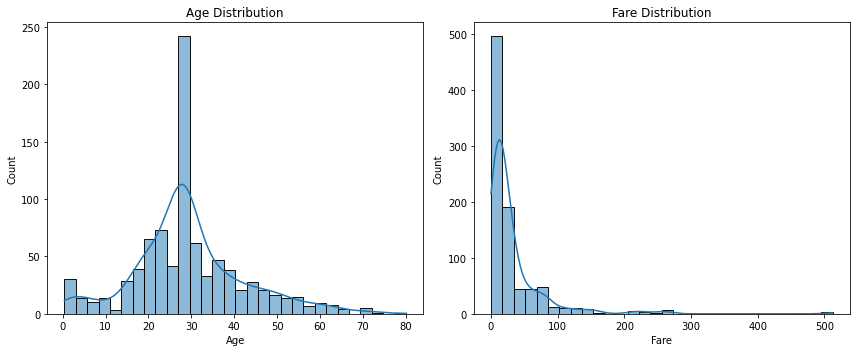

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.tight_layout()
plt.show()

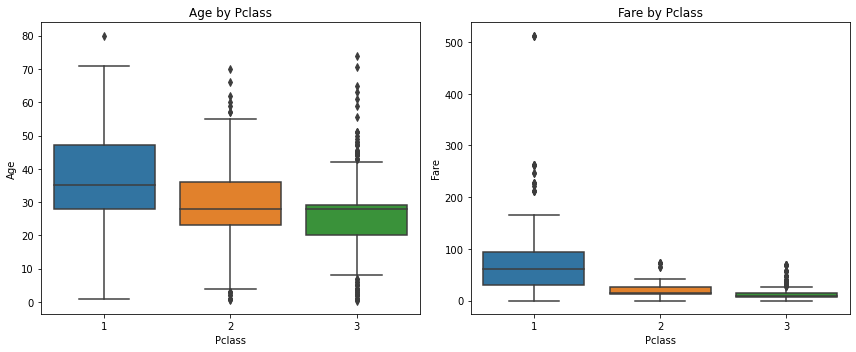

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age by Pclass')
plt.subplot(1, 2, 2)
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Pclass')
plt.tight_layout()
plt.show()

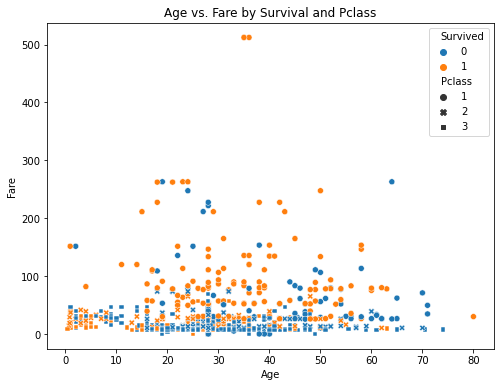

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Pclass', data=df)
plt.title('Age vs. Fare by Survival and Pclass')
plt.show()

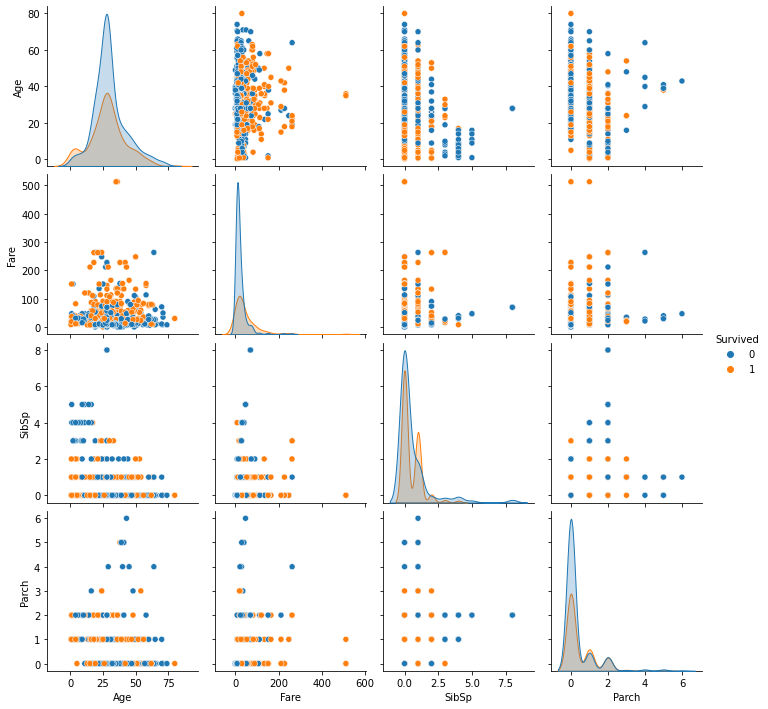

In [12]:
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue='Survived')
plt.show()

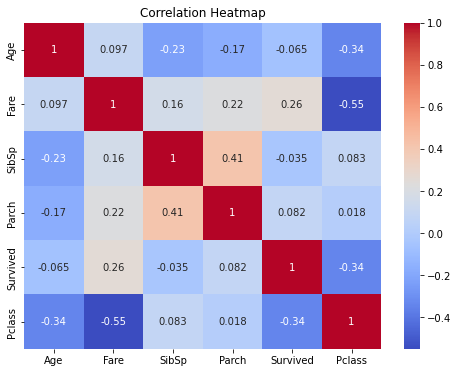

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived', 'Pclass']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Survival Analysis

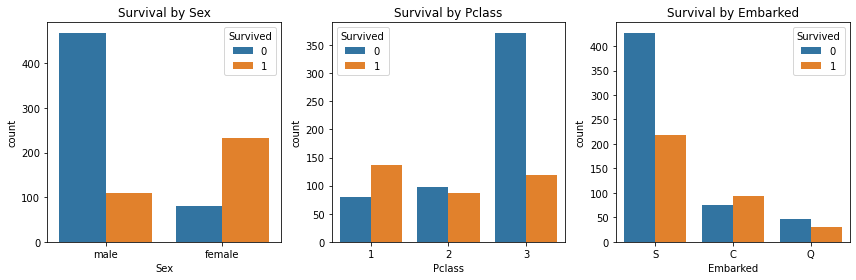

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.subplot(1, 3, 2)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Pclass')
plt.subplot(1, 3, 3)
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarked')
plt.tight_layout()
plt.show()